input GUT:
A6 = 10000.0
g1 = 0.7038317652
g2 = 0.690473022
g3 = 0.684972506
M1 = 136.108022
M2 = 1142.86222
M3 = 898.639714 

phi0 = 3.0e+16 

result:
V'(phi0) = -2.2237642083840895748e+20
V''(phi0) = -81227.80736140551744


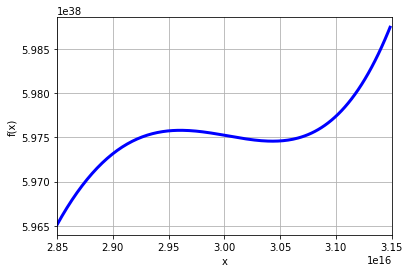


 POUR TESTER TREE, "b1, b2, b3 = 0, 0, 0" LINE 25


In [163]:
import mpmath as mp
from mpmath import *
import numpy as np

mp.dps = 500
mp.prec = 166

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)


phigut = mp.mpf('3e16')

# par exemple : 
A6gut = mp.mpf('10000')
g1gut, g2gut, g3gut = mp.sqrt(mp.mpf('5')/mp.mpf('3'))*mp.mpf('5.45185741e-01'), mp.mpf('6.90473022e-01'), mp.mpf('6.84972506e-01')
m1gut = mp.mpf('1.36108022e+02')
m2gut = mp.mpf('1.14286222e+03')
m3gut = mp.mpf('8.98639714e+02')

# pre = mp.mpf('1')/(mp.mpf('8')*mp.pi**2)


b1, b2, b3 = mp.mpf('33')/mp.mpf('5'), mp.mpf('1'), mp.mpf('-3')
# b1, b2, b3 = 0, 0, 0

g1 = lambda phi : g1gut/(mp.sqrt(1-pre*b1*g1gut**2*mp.log(phi/phigut)))
g2 = lambda phi : g2gut/(mp.sqrt(1-pre*b2*g2gut**2*mp.log(phi/phigut)))
g3 = lambda phi : g3gut/(mp.sqrt(1-pre*b3*g3gut**2*mp.log(phi/phigut)))

M1 = lambda phi : m1gut*(g1(phi)/g1gut)**mp.mpf('2')
M2 = lambda phi : m2gut*(g2(phi)/g2gut)**mp.mpf('2')
M3 = lambda phi : m3gut*(g3(phi)/g3gut)**mp.mpf('2')

mphi = lambda phi, mphigut : mp.sqrt(mphigut**2+(m2gut**2-M2(phi)**2)+mp.mpf('1')/11*(m1gut**2-M1(phi)**2))
A6 = lambda phi, A6gut : A6gut-mp.mpf('6')*(m2gut-M2(phi))-mp.mpf('6')/11*(m1gut-M1(phi))
lambda6 = lambda phi, lambda6gut : lambda6gut*(g2gut/g2(phi))**mp.mpf('6')*(g1gut/g1(phi))**(mp.mpf('6')/11)

mphi_run = lambda phi_start, phi_end, mphi_start : mp.sqrt(mphi_start**2+(M2(phi_start)**2-M2(phi_end)**2)+mp.mpf('1')/11*(M1(phi_start)**2-M1(phi_end)**2))
lambda6_run = lambda phi_start, phi_end, lambda6_start : lambda6_start*(g2(phi_start)/g2(phi_end))**mp.mpf('6')*(g1(phi_start)/g1(phi_end))**(mp.mpf('6')/11)

epsilon = 0
B1=b1/(16*mp.pi**2)
B2=b2/(16*mp.pi**2)
C1=2*B1
C2=2*B2
e1=1/11*b1/(4*mp.pi**2) 
# e1=3/(20*mp.pi**2)
e2=b2/(4*mp.pi**2)
# e2=1/(4*mp.pi**2)
F1=3*e1
F2=3*e2
D1=F1/2
D2=F2/2
# print(B1,B2,C1,C2,e1,e2,F1,F2,D1,D2)
def betag1(phi):
#     return mp.mpf('0')
    return 2*B1*g1(phi)**4
def betag2(phi):
#     return mp.mpf('0')
    return 2*B2*g2(phi)**4
def betaM1(phi):
#     return mp.mpf('0')
    return C1*g1(phi)**2*M1(phi)
def betaM2(phi):
#     return mp.mpf('0')
    return C2*g2(phi)**2*M2(phi)
def betam(phi):
#     return mp.mpf('0')
    return -e1*g1(phi)**2*M1(phi)**2-e2*g2(phi)**2*M2(phi)**2
def betaA(phi):
#     return mp.mpf('0')
    return -F1*g1(phi)**2*M1(phi)-F2*g2(phi)**2*M2(phi)
def betalambda(phi):
#     return mp.mpf('0')
    return -(D1*g1(phi)**2+D2*g2(phi)**2)
def CST1p(phi):
    return 2*epsilon/phi-betam(phi)
def CST2p(phi):
    return -2*((B1+C1)*e1*M1(phi)**2*g1(phi)**4+(B2+C2)*e2*M2(phi)**2*g2(phi)**4)+3*betam(phi)
def c1(phi):
    return -12*(5+betalambda(phi))
def c2(phi):
    return -12*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(9+2*betalambda(phi)))
def c3(phi):
    return betaA(phi)+A6(phi, A6gut)*(6+betalambda(phi))
def c4(phi):
    return (2*B1+C1)*F1*M1(phi)*g1(phi)**4+(2*B2+C2)*F2*M2(phi)*g2(phi)**4-betaA(phi)*(11+2*betalambda(phi))+A6(phi, A6gut)*(D1*betag1(phi)+D2*betag2(phi)-(5+betalambda(phi))*(6+betalambda(phi)))
def COEF1(phi):
    return 3*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi))**2 + (CST2p(phi)*c3(phi) - CST1p(phi)*c4(phi))*(c2(phi)*c3(phi) - c1(phi)*c4(phi))
def COEF2(phi):
    return 2*(6*(c1(phi) + c2(phi))*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi)) + (c3(phi) + c4(phi))*(c2(phi)*c3(phi) - c1(phi)*c4(phi)))
def COEF3(phi):
    return 12*(c1(phi) + c2(phi))**2
def mphi_FI(phi):
    Gilbert_res = mp.sqrt((-COEF2(phi) + mp.sqrt(COEF2(phi)**2-4*COEF1(phi)*COEF3(phi)))/(80*COEF3(phi)))
#     return Gilbert_res
    Maybe_typo = Gilbert_res*mp.sqrt('40')
    return Maybe_typo
def lambda6_FI(phi):
    return 3*Mp**3/phi**4*(CST2p(phi)*c1(phi) - CST1p(phi)*c2(phi) + 2*mphi_FI(phi)**2*(c1(phi) + c2(phi)))/(c2(phi)*c3(phi) - c1(phi)*c4(phi))

phi0 = mp.mpf('3e16')



# print(end='alpha_tree = ')
# nprint(A6gut**2/(40*mphi_run(phi0, phigut, mphi_FI(phi0))**2),10)
# print(end='phi0_tree = ')
# nprint((A6gut*Mp**3/(20*lambda6_run(phi0, phigut, lambda6_FI(phi0))))**0.25,10)


def V(phi, phi0, A6gut):
    mphi_FI_phi0, lambda6_FI_phi0 = mphi_FI(phi0), lambda6_FI(phi0)
    mphi_FI_gut, lambda6_FI_gut = mphi_run(phi0, phigut, mphi_FI_phi0), lambda6_run(phi0, phigut, lambda6_FI_phi0)
    return 1/2*mphi(phi, mphi_FI_gut)**2*phi**2-A6(phi, A6gut)*lambda6(phi, lambda6_FI_gut)*phi**6/(6*Mp**3)+lambda6(phi, lambda6_FI_gut)**2/Mp**6*phi**10
def DV(V, phi):
     return (V(phi+1)-V(phi-1))/mp.mpf('2')
def D2V(V, phi):
    return (V(phi+1)+V(phi-1)-2*V(phi))/mp.mpf('1')
def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf(1)*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)
print('input GUT:')
print('A6 =', nstr(A6gut,10))
print('g1 =',nstr(g1gut,10))
print('g2 =',nstr(g2gut,10))
print('g3 =',nstr(g3gut,10))
print('M1 =',nstr(m1gut,10))
print('M2 =',nstr(m2gut,10))
print('M3 =',nstr(m3gut,10),'\n')
print('phi0 =',nstr(phi0, 10),'\n')
print('result:')
print('V\'(phi0) =',nstr(DV(lambda phi : V(phi, phi0, A6gut), phi0),20))
print('V\'\'(phi0) =',nstr(D2V(lambda phi : V(phi, phi0, A6gut), phi0),20))
mp.plot(lambda phi : V(phi, phi0, A6gut), xlim=(phi0*0.95, phi0*1.05), points=200)


print('\n POUR TESTER TREE, "b1, b2, b3 = 0, 0, 0" LINE 25')
